<a href="https://colab.research.google.com/github/aritrasen87/attention_from_scratch/blob/main/Attention_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Self Attention**

In [ ]:
import numpy as np
import math

L, d_k, d_v = 4, 8, 8          # L - length of the sentence
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [ ]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[ 0.87757223  1.41105057  1.39977175  1.22420483  0.58558245  1.60610013
   0.02729193  0.43193749]
 [ 0.58707526  0.01123825 -0.51827508 -0.15856551  0.69769709 -0.39694259
  -0.39524898 -0.6928615 ]
 [-1.81231447  0.86402493  0.79163243 -0.36866392 -2.00432817 -1.12131051
  -1.76826089  0.64017657]
 [-0.50982929 -1.24802906  1.23380436  0.25323889 -0.1446522   0.10588238
  -0.47176492  1.60428027]]
K
 [[ 1.04372588  0.83044211  2.09467399 -0.20020522  1.28666529 -0.16825947
  -0.01522364  0.56527964]
 [-0.14427522 -0.84104147 -0.10414464  1.83733874  2.14565559  0.87855788
   0.31199133  0.94681323]
 [ 0.79656527  1.02426189  0.71771687  1.00009548 -0.19819071 -1.41670711
   0.35728425 -0.31602399]
 [ 1.21224347  1.5831578  -1.39003495 -0.85074681  0.28261228 -0.95817732
  -0.1001057   0.55875529]]
V
 [[-1.85183784 -1.65793419 -1.24690088 -1.36093298  0.71160803 -0.93550661
  -0.17420779 -0.19620049]
 [-0.14054867 -1.27902799  0.19040732  0.66091605 -0.03280491  0.40301596
  -0.4

In [ ]:
np.matmul(q, k.T)

array([[ 5.501671  ,  3.87512541,  1.85510829, -0.82429374],
       [ 0.14705528,  0.03744071,  0.45041819,  1.81473546],
       [-1.44344677, -6.45630206,  0.79255475, -0.57315409],
       [ 1.67529451,  2.61440866, -1.34251646, -3.72304565]])

In [ ]:
# Why we need sqrt(d_k) in denominator --- to reduce the variance after multiplication
q.var(), k.var(), np.matmul(q, k.T).var()

(0.9640774696750958, 0.8444673954026192, 7.608977734337012)

In [ ]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()  # reduced variance after scaling

(0.9640774696750958, 0.8444673954026192, 0.9511222167921263)

In [ ]:
scaled

array([[ 1.94513443,  1.37006373,  0.65587983, -0.29143185],
       [ 0.05199189,  0.01323729,  0.15924688,  0.64160587],
       [-0.5103355 , -2.28264748,  0.28021042, -0.20264057],
       [ 0.59230605,  0.92433304, -0.47465125, -1.31629541]])

**Masking**
*   This is to ensure words don't get context from words generated in the future.
*   Not required in the encoders, but required int he decoders

In [ ]:
mask = np.tril(np.ones( (L, L) ))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [ ]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [ ]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [ ]:
scaled + mask # -inf will become zero after softmax

array([[ 1.94513443,        -inf,        -inf,        -inf],
       [ 0.05199189,  0.01323729,        -inf,        -inf],
       [-0.5103355 , -2.28264748,  0.28021042,        -inf],
       [ 0.59230605,  0.92433304, -0.47465125, -1.31629541]])

Softmax applied to scaled + mask

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [ ]:
attention = softmax(scaled + mask)

In [ ]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.50968744, 0.49031256, 0.        , 0.        ],
       [0.29633675, 0.05035936, 0.65330389, 0.        ],
       [0.34648451, 0.48292681, 0.11920931, 0.05137937]])

In [ ]:
new_v = np.matmul(attention, v)
new_v

array([[-1.85183784, -1.65793419, -1.24690088, -1.36093298,  0.71160803,
        -0.93550661, -0.17420779, -0.19620049],
       [-1.01277126, -1.47215172, -0.54217062, -0.36959501,  0.34661302,
        -0.27921218, -0.30286279,  0.76038101],
       [ 0.59779913,  0.0477269 , -0.54270624, -1.85967371, -0.77879283,
        -1.1215145 , -0.02010553,  0.58789534],
       [-0.5532956 , -1.12356456, -0.35281419, -0.46856108,  0.02777035,
        -0.31830828, -0.20879823,  0.88874053]])

Self Attention Function

In [ ]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [ ]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.87757223  1.41105057  1.39977175  1.22420483  0.58558245  1.60610013
   0.02729193  0.43193749]
 [ 0.58707526  0.01123825 -0.51827508 -0.15856551  0.69769709 -0.39694259
  -0.39524898 -0.6928615 ]
 [-1.81231447  0.86402493  0.79163243 -0.36866392 -2.00432817 -1.12131051
  -1.76826089  0.64017657]
 [-0.50982929 -1.24802906  1.23380436  0.25323889 -0.1446522   0.10588238
  -0.47176492  1.60428027]]
K
 [[ 1.04372588  0.83044211  2.09467399 -0.20020522  1.28666529 -0.16825947
  -0.01522364  0.56527964]
 [-0.14427522 -0.84104147 -0.10414464  1.83733874  2.14565559  0.87855788
   0.31199133  0.94681323]
 [ 0.79656527  1.02426189  0.71771687  1.00009548 -0.19819071 -1.41670711
   0.35728425 -0.31602399]
 [ 1.21224347  1.5831578  -1.39003495 -0.85074681  0.28261228 -0.95817732
  -0.1001057   0.55875529]]
V
 [[-1.85183784 -1.65793419 -1.24690088 -1.36093298  0.71160803 -0.93550661
  -0.17420779 -0.19620049]
 [-0.14054867 -1.27902799  0.19040732  0.66091605 -0.03280491  0.40301596
  -0.4

**Multihead Attention**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
sequence_length = 4
batch_size = 1
input_dim = 512
d_model = 512 # model output
x = torch.randn( (batch_size, sequence_length, input_dim) )

In [ ]:
x

tensor([[[-0.2274, -0.2506,  2.4013,  ...,  0.8887,  0.7475,  1.1164],
         [-1.0460, -0.9515,  1.1646,  ...,  0.3300, -0.6437, -0.1216],
         [-0.2700,  1.1487,  0.3804,  ..., -1.5539, -0.8287,  0.2541],
         [ 0.2532, -1.0821, -0.6582,  ...,  1.1065, -0.9620,  2.5151]]])

In [ ]:
x.shape

torch.Size([1, 4, 512])

In [ ]:
qkv_layer = nn.Linear(input_dim , 3 * d_model) # q, k ,v vectors concatenated

In [ ]:
qkv = qkv_layer(x)

In [ ]:
qkv.shape

torch.Size([1, 4, 1536])

In [ ]:
512*3

1536

Text(0.5, 1.0, 'qkv distribution')

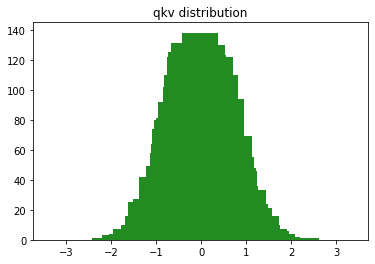

In [ ]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [ ]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim)

In [ ]:
d_model

512

In [ ]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [ ]:
head_dim    

64

In [ ]:
qkv = qkv.permute(0, 2, 1, 3) # [batch_size, num_heads, sequence_length, 3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [ ]:
q, k, v = qkv.chunk(3, dim=-1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

Self Attention for multiple heads

In [ ]:
d_k = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k) # transpose to match the seq length , so that o/p is seq_len * seq_len
scaled.shape

torch.Size([1, 8, 4, 4])

In [ ]:
k.shape , q.shape

(torch.Size([1, 8, 4, 64]), torch.Size([1, 8, 4, 64]))

In [ ]:
k.T.shape

<ipython-input-35-879c2705464e>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [ ]:
k.transpose(-1, -2).shape     

torch.Size([1, 8, 64, 4])

In [ ]:
# mask creation
mask = torch.full(scaled.size() , float('-inf'))
mask = torch.triu(mask, diagonal=1)

In [ ]:
mask[0][0] # first mask

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [ ]:
(scaled + mask)[0][0]

tensor([[ 0.6855,    -inf,    -inf,    -inf],
        [ 0.1394, -0.1385,    -inf,    -inf],
        [ 0.3950, -0.3658,  0.2897,    -inf],
        [ 0.4977, -0.2434,  0.0819, -0.8292]], grad_fn=<SelectBackward0>)

In [ ]:
scaled += mask

In [ ]:
attention = F.softmax(scaled, dim=-1) # row by row

In [ ]:
attention.shape

torch.Size([1, 8, 4, 4])

In [ ]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.5690, 0.4310, 0.0000, 0.0000],
        [0.4224, 0.1974, 0.3802, 0.0000],
        [0.4164, 0.1984, 0.2747, 0.1105]], grad_fn=<SelectBackward0>)

In [ ]:
values = torch.matmul(attention, v) # new_values = attention * value vector --- this is more context aware
values.shape

torch.Size([1, 8, 4, 64])

Function

In [ ]:
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [ ]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [ ]:
attention.shape , values.shape

(torch.Size([1, 8, 4, 4]), torch.Size([1, 8, 4, 64]))

In [ ]:
values = values.reshape(batch_size, sequence_length, num_heads * head_dim)
values.size()

torch.Size([1, 4, 512])

In [ ]:
linear_layer = nn.Linear(d_model, d_model)


In [ ]:
out = linear_layer(values)

In [ ]:
out.shape

torch.Size([1, 4, 512])

In [ ]:
out

tensor([[[ 0.0302,  0.3632,  0.5183,  ..., -0.0262,  0.4259, -0.0604],
         [ 0.0390,  0.3322, -0.1811,  ...,  0.0118, -0.0961,  0.1335],
         [ 0.3549,  0.3774, -0.1839,  ..., -0.0942, -0.2115, -0.0393],
         [ 0.0883,  0.1465,  0.2897,  ..., -0.0872, -0.0476,  0.0149]]],
       grad_fn=<ViewBackward0>)

Class : MultiHead Attention

In [ ]:
import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

In [ ]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])


**Positional Encoding**

In [ ]:
import torch
import torch.nn as nn

max_sequence_length = 10
d_model = 6

In [ ]:
even_i = torch.arange(0, d_model, 2).float()
even_i

tensor([0., 2., 4.])

In [ ]:
even_denominator = torch.pow(10000, even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [ ]:
even_denominator = torch.pow(10000, (odd_i - 1)/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

even_denominator and odd_denominator are the same! So we can just do one of these actions and call the resulting variable denominator

In [ ]:
denominator = even_denominator

In [ ]:
position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)

In [ ]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [ ]:
even_PE = torch.sin(position / denominator)
odd_PE = torch.cos(position / denominator)

In [ ]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [ ]:
even_PE.shape

torch.Size([10, 3])

In [ ]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [ ]:
odd_PE.shape

torch.Size([10, 3])

In [ ]:
stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [ ]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

Class
Let's combine all the code above into a cute class

In [ ]:

import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [ ]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

**Layer Normalization**

In [ ]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3], [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()

torch.Size([2, 1, 3])

In [ ]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta =  nn.Parameter(torch.zeros(parameter_shape))

In [ ]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [ ]:
dims = [-(i + 1) for i in range(len(parameter_shape))]

In [ ]:
dims

[-1, -2]

In [ ]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([2, 1, 1])

In [ ]:
mean

tensor([[[0.2000]],

        [[0.2333]]])

In [ ]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [ ]:
y = (inputs - mean) / std
y

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [ ]:
out = gamma * y + beta

In [ ]:
out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [ ]:
import torch
from torch import nn

class LayerNormalization():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out

In [ ]:
batch_size = 3
sentence_length = 5
embedding_dim = 8 
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-0.9644,  0.6828,  1.2079, -2.2441,  0.2633, -0.0366,  1.5427,
           0.0068],
         [-0.7202,  0.2460, -0.1259, -1.2465, -1.2472, -1.0066, -1.2364,
           0.1491],
         [-0.0915,  0.8822,  0.9283,  0.3437,  0.3083,  1.1175, -0.3567,
           1.3288]],

        [[-0.1334,  1.3315,  0.6787,  1.2111,  1.6449, -0.5478,  1.9520,
           1.0336],
         [-0.6436, -0.7713, -0.8779,  1.7093, -0.5216,  0.3714,  0.3243,
          -0.1690],
         [ 0.4332,  0.3065, -0.1248,  0.1267,  1.4477,  0.7700, -0.0874,
           2.3913]],

        [[-1.0006, -0.2248,  0.0112, -1.9032,  0.0424,  0.4494, -0.6080,
          -1.5518],
         [-1.3478,  0.3302, -0.6276, -0.7306,  1.3240,  1.0568, -0.2664,
           0.2023],
         [-0.2866, -0.1112, -0.6452,  1.8281,  0.4271,  1.6089, -0.3534,
           0.0358]],

        [[ 1.2079,  0.7964,  0.3402,  1.2852, -0.8252,  0.5133, -2.4035,
          -0.1207],
         [-1.7538,  0.5456, 

# Blowing up the Encoder

In [ ]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    print(f"scaled.size() : {scaled.size()}")
    if mask is not None:
        print(f"-- ADDING MASK of shape {mask.size()} --") 
        # Broadcasting add. So just the last N dimensions need to match
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiHeadAttention(nn.Module):

    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(d_model , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, max_sequence_length, d_model = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, max_sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, max_sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


class LayerNormalization(nn.Module):
    def __init__(self, parameters_shape, eps=1e-5):
        super().__init__()
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, inputs):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean ({mean.size()})")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation  ({std.size()})")
        y = (inputs - mean) / std
        print(f"y: {y.size()}")
        out = self.gamma * y  + self.beta
        print(f"self.gamma: {self.gamma.size()}, self.beta: {self.beta.size()}")
        print(f"out: {out.size()}")
        return out

  
class PositionwiseFeedForward(nn.Module):

    def __init__(self, d_model, hidden, drop_prob=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden)
        self.linear2 = nn.Linear(hidden, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=drop_prob)

    def forward(self, x):
        x = self.linear1(x)
        print(f"x after first linear layer: {x.size()}")
        x = self.relu(x)
        print(f"x after activation: {x.size()}")
        x = self.dropout(x)
        print(f"x after dropout: {x.size()}")
        x = self.linear2(x)
        print(f"x after 2nd linear layer: {x.size()}")
        return x


class EncoderLayer(nn.Module):

    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(d_model=d_model, num_heads=num_heads)
        self.norm1 = LayerNormalization(parameters_shape=[d_model])
        self.dropout1 = nn.Dropout(p=drop_prob)
        self.ffn = PositionwiseFeedForward(d_model=d_model, hidden=ffn_hidden, drop_prob=drop_prob)
        self.norm2 = LayerNormalization(parameters_shape=[d_model])
        self.dropout2 = nn.Dropout(p=drop_prob)

    def forward(self, x):
        residual_x = x
        print("------- ATTENTION 1 ------")
        x = self.attention(x, mask=None)
        print("------- DROPOUT 1 ------")
        x = self.dropout1(x)
        print("------- ADD AND LAYER NORMALIZATION 1 ------")
        x = self.norm1(x + residual_x)
        residual_x = x
        print("------- ATTENTION 2 ------")
        x = self.ffn(x)
        print("------- DROPOUT 2 ------")
        x = self.dropout2(x)
        print("------- ADD AND LAYER NORMALIZATION 2 ------")
        x = self.norm2(x + residual_x)
        return x

class Encoder(nn.Module):
    def __init__(self, d_model, ffn_hidden, num_heads, drop_prob, num_layers):
        super().__init__()
        self.layers = nn.Sequential(*[EncoderLayer(d_model, ffn_hidden, num_heads, drop_prob)
                                     for _ in range(num_layers)])

    def forward(self, x):
        x = self.layers(x)
        return x

In [ ]:
d_model = 512
num_heads = 8
drop_prob = 0.1
batch_size = 30
max_sequence_length = 200
ffn_hidden = 2048
num_layers = 5

encoder = Encoder(d_model, ffn_hidden, num_heads, drop_prob, num_layers)

In [ ]:
x = torch.randn( (batch_size, max_sequence_length, d_model) ) # includes positional encoding
out = encoder(x)

------- ATTENTION 1 ------
x.size(): torch.Size([30, 200, 512])
qkv.size(): torch.Size([30, 200, 1536])
qkv.size(): torch.Size([30, 200, 8, 192])
qkv.size(): torch.Size([30, 8, 200, 192])
q size: torch.Size([30, 8, 200, 64]), k size: torch.Size([30, 8, 200, 64]), v size: torch.Size([30, 8, 200, 64]), 
scaled.size() : torch.Size([30, 8, 200, 200])
values.size(): torch.Size([30, 8, 200, 64]), attention.size:torch.Size([30, 8, 200, 200]) 
values.size(): torch.Size([30, 200, 512])
out.size(): torch.Size([30, 200, 512])
------- DROPOUT 1 ------
------- ADD AND LAYER NORMALIZATION 1 ------
Mean (torch.Size([30, 200, 1]))
Standard Deviation  (torch.Size([30, 200, 1]))
y: torch.Size([30, 200, 512])
self.gamma: torch.Size([512]), self.beta: torch.Size([512])
out: torch.Size([30, 200, 512])
------- ATTENTION 2 ------
x after first linear layer: torch.Size([30, 200, 2048])
x after activation: torch.Size([30, 200, 2048])
x after dropout: torch.Size([30, 200, 2048])
x after 2nd linear layer: torch.